In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv, re
import nltk
import string
from html.parser import HTMLParser
import pickle
import logging
import warnings
import gensim
import pyLDAvis

from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.manifold import TSNE


%matplotlib inline

In [2]:
df = pd.read_pickle('more_tweet_data.pkl')

In [3]:
# nltk.download('wordnet')
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# nltk.download('punkt')
# nltk.download("gutenberg")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leesurkis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/leesurkis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/leesurkis/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

### Count Vectorizer

### TF-IDF Vectorizer

In [4]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=10000)

X = word_vectorizer.fit_transform(df.stemmed)

# char_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='char',
#     ngram_range=(1, 6),
#     max_features=30000)
# char_vectorizer.fit(df.stemmed)

In [5]:
# wordvec = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

In [6]:
# word_vectorizer.get_feature_names()

In [7]:
tfidf_vecs = pd.DataFrame(X.toarray(), index=df.stemmed, columns=word_vectorizer.get_feature_names())

In [8]:
tfidf_vecs.head()

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
stemmed,,,,,,,,,,,,,,,,,,,,,
fuck heck fridge knock landlord door ##,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
indian uber driver word wasnt vehicle jump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ask parcel deliver pick store address,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whichever butt wipe pull alarm davis sound asleep ######,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
join phone talk rude money acc willynilly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Preidct using NMF on my new data
- it will give you vector of 10 values
- highest value will be associated emotion

### NMF on TF-IDF

In [9]:
nmf_model = NMF(6)
nmf_topics = nmf_model.fit_transform(tfidf_vecs)

In [10]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6"],
             columns = word_vectorizer.get_feature_names())
topic_word

,aaa,aaron,abbys,aber,aberdeen,abhijit,ability,abla,able,aboard,...,yuuuhh,zandu,zephaniah,zero,zeth,zika,zilch,zombie,zone,zoolander
component_1,0.001,0.006,0.007,0.002,0.0,0.001,0.028,0.005,0.021,0.000,...,0.002,0.0,0.008,0.031,0.004,0.001,0.007,0.003,0.01,0.055
component_2,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_3,0.000,0.000,0.000,0.000,0.0,0.000,0.013,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_4,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.001,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_5,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.002,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
component_6,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.001,...,0.000,0.0,0.000,0.003,0.001,0.000,0.000,0.000,0.00,0.000


In [11]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
display_topics(nmf_model, word_vectorizer.get_feature_names(), 10)


Topic  0
start, need, watch, leave, fuck, play, right, new, pout, thank

Topic  1
love, smile, new, movien, optimism, talk, happy, thank, teach, song

Topic  2
good, happy, morning, saturday, weary, birthday, grow, awesome, worry, fall

Topic  3
feel, right, night, exhilaration, accept, challenge, victory, future, drown, worthless

Topic  4
look, color, bright, forward, bring, heyday, old, girls, tweet, rabid

Topic  5
people, offend, irritate, black, fuck, unhappy, happen, angry, country, straight


### PCA

In [13]:
pca = PCA(n_components=6) 
pca.fit(tfidf_vecs)
pcafeatures_train = pca.transform(tfidf_vecs)

In [14]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(5,5))
    for i, c, label in zip(target_ids, colors, target_names):
        ax = plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    
    plt.legend()



# other colours: ,'m','y','orange','w','aqua','yellow'

In [15]:
pca.explained_variance_ratio_

array([0.00452122, 0.00410389, 0.00391016, 0.00354204, 0.00318648,
       0.00297793])

Plot graph to see elbow of how many components to include

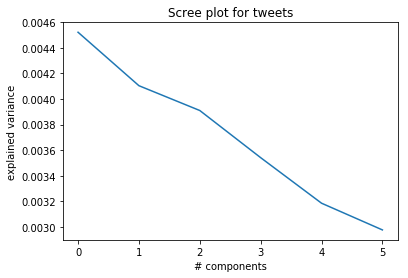

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for tweets');

In [17]:
pd.DataFrame(pcafeatures_train)

,0,1,2,3,4,5
0,-0.013284,-0.011167,-0.017395,-0.015062,0.039948,-0.003321
1,-0.002890,-0.019493,-0.007101,-0.001666,-0.003518,-0.014170
2,-0.019572,-0.013882,-0.004203,-0.010898,-0.011623,-0.014961
3,-0.012361,-0.001451,-0.016111,-0.004606,-0.017091,-0.008128
4,-0.005911,-0.024407,-0.014689,-0.009849,0.016458,-0.005604
5,-0.020508,-0.000133,0.004774,-0.011678,-0.011927,-0.017957
6,-0.032153,-0.029218,-0.022145,-0.049040,-0.041261,0.101728
7,-0.012378,-0.015534,-0.015574,-0.007345,-0.023536,-0.024376
8,-0.009446,-0.008823,-0.015243,-0.030684,0.303225,-0.004857
9,-0.000231,-0.020959,-0.000847,-0.012089,-0.056461,-0.196988


In [18]:
target_names = [0, 1, 2, 3, 4, 5]

In [19]:
df.emotion.unique()

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [20]:
df.emotion = df.emotion.replace({'anger':0, 'fear':1, 'joy':2, 'sadness':3})

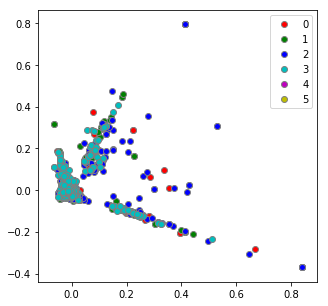

In [21]:
plot_PCA_2D(pcafeatures_train, target=df.emotion, target_names=target_names)

### T-SNE plot

In [22]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [37]:
# Utility function to visualize the outputs of PCA and t-SNE

def scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [38]:
# NMF T-SNE
tsne = TSNE(random_state=RS).fit_transform(nmf_topics)

(<Figure size 576x576 with 1 Axes>,
 [Text(-3.2725637, -1.8283027, '0'),
  Text(-3.8812323, 0.4593676, '1'),
  Text(-2.6975641, 3.264092, '2'),
  Text(-6.173506, -2.3124514, '3')])

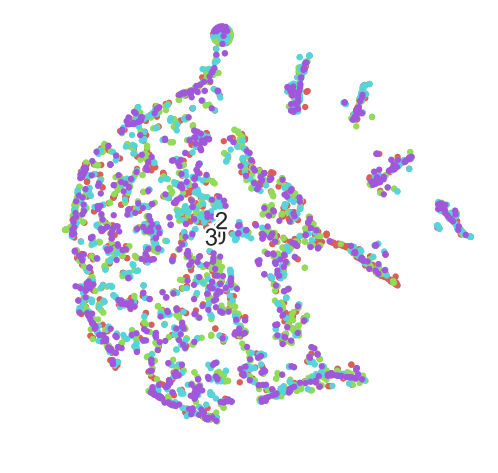

In [39]:

scatter(tsne, df.emotion)

In [40]:
# PCA T-SNE
tsne = TSNE(random_state=RS).fit_transform(pcafeatures_train)

(<Figure size 576x576 with 1 Axes>,
 [Text(1.8648385, -0.5483684, '0'),
  Text(-1.6832938, -3.0649064, '1'),
  Text(4.3895025, -0.6460331, '2'),
  Text(-0.0067499597, -1.6148229, '3')])

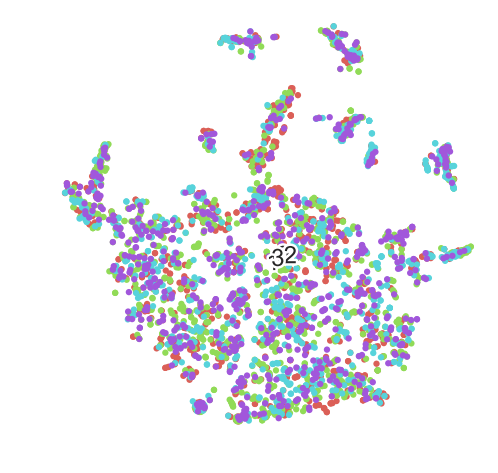

In [41]:
scatter(tsne, df.emotion)